# 데이터시각화특강 기말평가 답안 (문제3)
## 202055364 황성윤

## 3. COVID19 시도별/일별 감염자수 시각화 (20점)

아래는 COVID19 확진자수를 지역별로 매일 기록한 자료이다. (#2와 동일한 자료임)

다음을 잘 읽고 시각화 하라.

`(1)` 코로나 확진자 현황을 line plot으로 시각화라. 도시별로 별도의 lineplot을 그리고 x축은 요일, y축은 확진자수로 설정하라. 시각화도구는 판다스데이터프레임의 `.plot()` 메소드를 사용하고 backend는 `matplotlib`을 이용하라. 시각화 예시는 아래와 같다.

In [1]:
import folium 
import pandas as pd 
import numpy as np
import json 
import requests 
import plotly.express as px
from IPython.display import HTML

In [2]:
covid_example=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/covid19_20211202.csv')
covid_example

,일자,계(명),서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
0,누적(명),"457,612","158,774","16,555","19,114","25,299","6,353","8,809","5,675","1,588","136,546","8,889","8,942","13,174","6,453","4,498","11,471","15,236","3,762","6,474"
1,2020-01-20,1,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,2020-01-21,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,2020-01-22,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2020-01-23,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,2021-11-28,"3,925","1,673",148,106,278,52,53,4,5,"1,090",63,25,121,45,25,103,89,35,10
680,2021-11-29,"3,308","1,393",144,88,233,61,43,2,15,910,56,33,52,49,28,68,86,44,3
681,2021-11-30,"3,032","1,186",79,78,192,52,43,3,22,909,84,59,81,50,36,68,60,22,8
682,2021-12-01,"5,123","2,222",143,86,326,29,88,17,20,"1,582",105,48,96,50,40,97,127,27,20


In [3]:
json_korea_prov='https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json'
json_korea = json.loads(requests.get(json_korea_prov).text)
[json_korea['features'][i]['properties']['name_eng'] for i in range(17)]

['Seoul',
 'Busan',
 'Daegu',
 'Incheon',
 'Gwangju',
 'Daejeon',
 'Ulsan',
 'Sejongsi',
 'Gyeonggi-do',
 'Gangwon-do',
 'Chungcheongbuk-do',
 'Chungcheongnam-do',
 'Jeollabuk-do',
 'Jeollanam-do',
 'Gyeongsangbuk-do',
 'Gyeongsangnam-do',
 'Jeju-do']

In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import warnings
from IPython.display import HTML
from pandas_datareader import data as pdr

In [5]:
covid_ver1=covid_example.iloc[1:,:].replace('-','0').\
iloc[:,map(lambda x: x != '계(명)' and x != '검역', covid_example.columns)].\
set_index('일자').applymap(lambda x: float(x.replace(',',''))).reset_index()
covid_ver1

,일자,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2020-01-20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2021-11-28,1673.0,148.0,106.0,278.0,52.0,53.0,4.0,5.0,1090.0,63.0,25.0,121.0,45.0,25.0,103.0,89.0,35.0
679,2021-11-29,1393.0,144.0,88.0,233.0,61.0,43.0,2.0,15.0,910.0,56.0,33.0,52.0,49.0,28.0,68.0,86.0,44.0
680,2021-11-30,1186.0,79.0,78.0,192.0,52.0,43.0,3.0,22.0,909.0,84.0,59.0,81.0,50.0,36.0,68.0,60.0,22.0
681,2021-12-01,2222.0,143.0,86.0,326.0,29.0,88.0,17.0,20.0,1582.0,105.0,48.0,96.0,50.0,40.0,97.0,127.0,27.0


In [6]:
newname = [json_korea['features'][i]['properties']['name_eng'] for i in range(17)]
for i in range(len(newname)):
    covid_ver1=covid_ver1.rename(columns={covid_ver1.columns[i+1]:newname[i]})
    
covid_ver1=covid_ver1.rename(columns={'일자':'Date'})
covid_ver1

,Date,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejongsi,Gyeonggi-do,Gangwon-do,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju-do
0,2020-01-20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2021-11-28,1673.0,148.0,106.0,278.0,52.0,53.0,4.0,5.0,1090.0,63.0,25.0,121.0,45.0,25.0,103.0,89.0,35.0
679,2021-11-29,1393.0,144.0,88.0,233.0,61.0,43.0,2.0,15.0,910.0,56.0,33.0,52.0,49.0,28.0,68.0,86.0,44.0
680,2021-11-30,1186.0,79.0,78.0,192.0,52.0,43.0,3.0,22.0,909.0,84.0,59.0,81.0,50.0,36.0,68.0,60.0,22.0
681,2021-12-01,2222.0,143.0,86.0,326.0,29.0,88.0,17.0,20.0,1582.0,105.0,48.0,96.0,50.0,40.0,97.0,127.0,27.0


array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

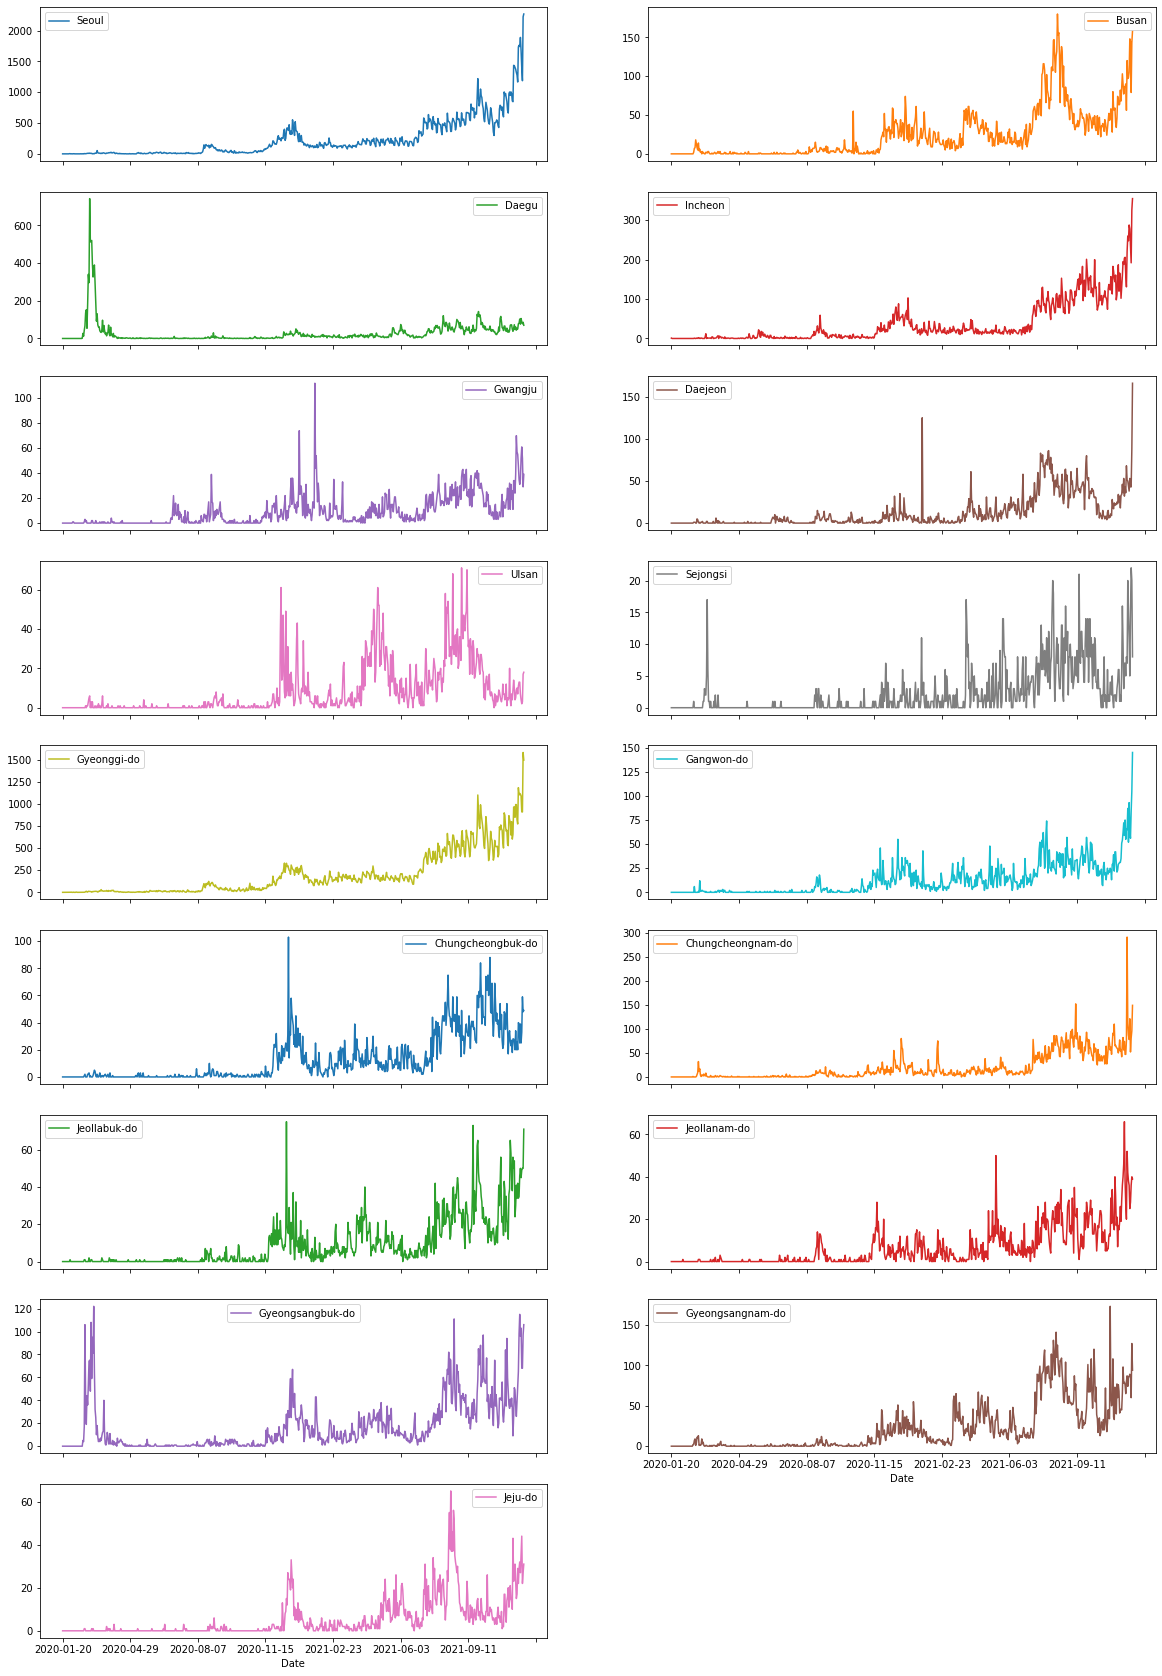

In [7]:
covid_ver1.plot.line(x='Date',figsize=(20,30),subplots=True,layout=(9,2))

`(2)` `(1)`과 같은 시각화를 `plotly backend`를 이용하여 시각화 하라. 시각화 예시는 아래와 같다.

In [8]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def show(fig): 
    return HTML(fig.to_html(include_plotlyjs='cdn',include_mathjax=False, config=dict({'scrollZoom':False})))

In [9]:
covid_ver2=covid_ver1.melt(id_vars='Date').rename(columns={'variable':'prov','value':'covid19'})
covid_ver2

,Date,prov,covid19
0,2020-01-20,Seoul,0.0
1,2020-01-21,Seoul,0.0
2,2020-01-22,Seoul,0.0
3,2020-01-23,Seoul,0.0
4,2020-01-24,Seoul,1.0
...,...,...,...
11606,2021-11-28,Jeju-do,35.0
11607,2021-11-29,Jeju-do,44.0
11608,2021-11-30,Jeju-do,22.0
11609,2021-12-01,Jeju-do,27.0


In [10]:
fig=covid_ver2.plot.line(x='Date', y='covid19', facet_col='prov', color='prov',
                         facet_col_wrap=3, facet_col_spacing=0.04, backend='plotly', height=1000)
#fig.update_yaxes(matches=None,showticklabels=True)
#fig.show(config=dict({'scrollZoom':False}))
#show(fig)